<a href="https://colab.research.google.com/github/Shanmithadurga123/Fmml/blob/main/M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

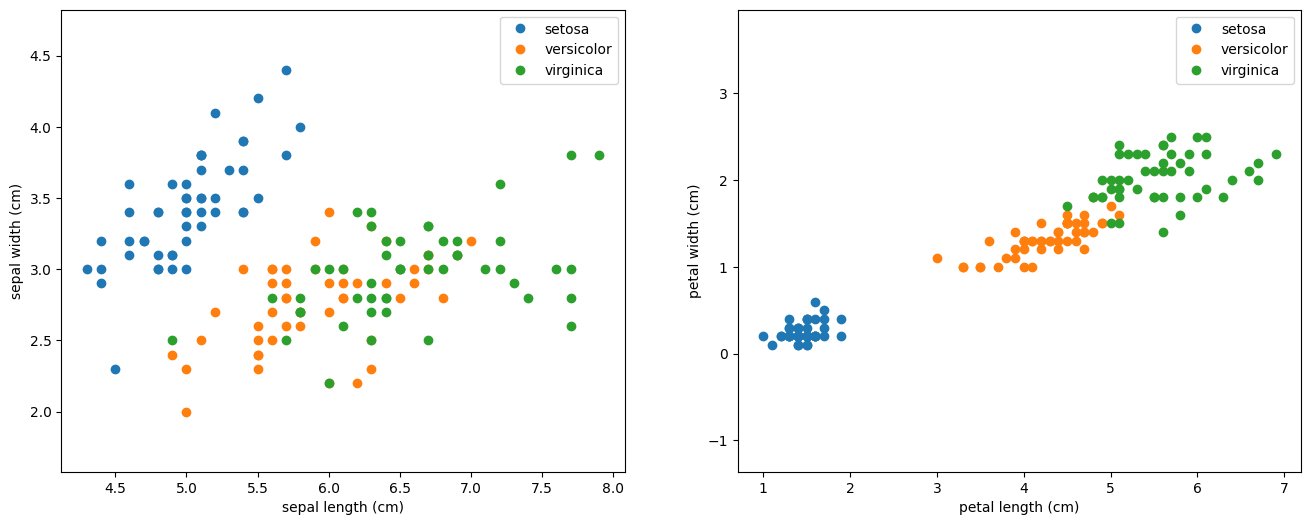

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 362.92it/s]


# Plot training progress

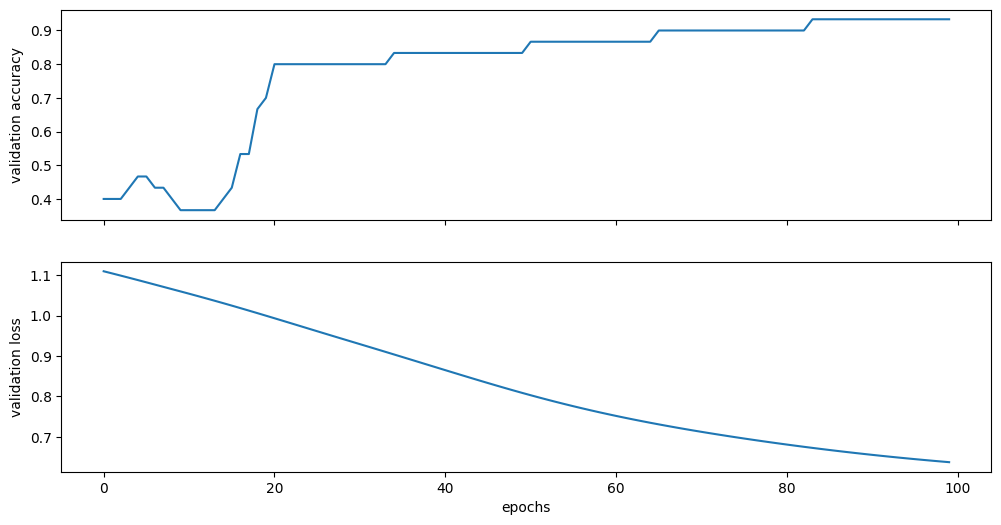

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

ANSWERS:

1. Sure, adjusting the number of hidden layers in a machine learning model can have a significant impact on its performance and ability to learn complex patterns in data. Here are some considerations when deciding on the number of hidden layers:

1. **Model Complexity**: Increasing the number of hidden layers generally increases the model's capacity to learn complex patterns in the data. However, too many layers can lead to overfitting, where the model learns to memorize the training data rather than generalize well to unseen data.

2. **Training Time**: Adding more hidden layers can increase the training time of the model, as there are more parameters to learn and more computations to perform during each training iteration.

3. **Data Complexity**: The complexity of the dataset can also influence the optimal number of hidden layers. For simple datasets, a model with fewer hidden layers may be sufficient, while complex datasets may require deeper architectures with more layers.

4. **Computational Resources**: Deeper models with more hidden layers require more computational resources for training and inference. Consider the available resources when deciding on the architecture of your model.

5. **Regularization**: Regularization techniques such as dropout and weight decay can help prevent overfitting in deeper models by reducing the risk of co-adaptation between neurons in adjacent layers.

6. **Empirical Evaluation**: Ultimately, the best approach is often to experiment with different architectures, including varying the number of hidden layers, and evaluate their performance on a validation set.

In practice, it's common to start with a simple architecture and gradually increase the number of hidden layers if needed, monitoring performance on a validation set to avoid overfitting. Additionally, techniques like cross-validation can help assess the generalization performance of different architectures.

2. Certainly! Modifying the number of neurons in the hidden layers of a neural network can also significantly affect its performance and behavior. Here are some considerations when adjusting the number of neurons:

1. **Model Capacity**: Increasing the number of neurons in a hidden layer increases the model's capacity to learn complex patterns in the data. More neurons allow the model to capture finer details and nuances in the input-output mapping. However, too many neurons can lead to overfitting, especially if the training data is limited.

2. **Computational Complexity**: Adding more neurons increases the computational complexity of the model, both during training and inference. This can impact training time and memory requirements, particularly for deep networks with many layers.

3. **Generalization**: A model with too few neurons may struggle to capture the underlying structure of the data, leading to poor generalization performance on unseen examples. Finding the right balance of neurons is crucial for achieving good generalization while avoiding overfitting.

4. **Empirical Evaluation**: Experimentation and empirical evaluation are key to determining the optimal number of neurons for a given task and dataset. It's often a process of trial and error, where you train models with different numbers of neurons and evaluate their performance on a validation set.

5. **Rule of Thumb**: There's no one-size-fits-all rule for selecting the number of neurons in a hidden layer. However, a common heuristic is to use a number of neurons somewhere between the number of input and output neurons. This is a starting point and can be adjusted based on the specific characteristics of the problem.

6. **Regularization**: As with adjusting the number of hidden layers, regularization techniques such as dropout can help prevent overfitting when using a large number of neurons in a hidden layer.

In summary, the number of neurons in the hidden layers of a neural network is a hyperparameter that requires careful tuning based on the characteristics of the data, the complexity of the task, and the available computational resources. Experimentation and validation are essential for finding the optimal architecture for a given problem.

3. Certainly! The choice of activation function in a neural network can greatly influence its learning dynamics, convergence behavior, and ultimately, its performance. Here are a few different activation functions commonly used in machine learning:

1. **Rectified Linear Unit (ReLU)**: ReLU is one of the most widely used activation functions due to its simplicity and effectiveness. It outputs 0 for negative inputs and the input value for positive inputs.
   \[ \text{ReLU}(x) = \max(0, x) \]

2. **Sigmoid**: Sigmoid squashes the input to the range (0, 1), making it suitable for binary classification tasks or when you need probabilities as outputs.
   \[ \text{Sigmoid}(x) = \frac{1}{1 + e^{-x}} \]

3. **Hyperbolic Tangent (tanh)**: Similar to the sigmoid function, but squashes the input to the range (-1, 1). It's often used in hidden layers of neural networks.
   \[ \text{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \]

4. **Scaled Exponential Linear Unit (SELU)**: SELU is a self-normalizing activation function that can improve the convergence of deep neural networks. It maintains a mean of 0 and a standard deviation of 1 for the activations in each layer, helping to mitigate vanishing/exploding gradient problems.
   \[ \text{SELU}(x) = \lambda \times (\text{max}(0, x) + \text{min}(0, \alpha \times (\exp(x) - 1))) \]
   where \(\lambda\) and \(\alpha\) are pre-defined constants.

5. **Softmax**: Softmax is commonly used as the activation function for the output layer in multi-class classification problems. It squashes the outputs to probabilities that sum up to 1.
   \[ \text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}} \]

6. **Leaky ReLU**: Leaky ReLU is a variant of ReLU that allows a small gradient when the input is negative, which helps alleviate the "dying ReLU" problem where neurons could become inactive during training.
   \[ \text{LeakyReLU}(x) = \begin{cases} x, & \text{if } x > 0 \\ \alpha x, & \text{otherwise} \end{cases} \]
   where \(\alpha\) is a small constant.

7. **Exponential Linear Unit (ELU)**: ELU is another variant of ReLU that has a smooth non-linearity for negative input values, which can help improve learning dynamics.
   \[ \text{ELU}(x) = \begin{cases} x, & \text{if } x > 0 \\ \alpha \times (e^x - 1), & \text{otherwise} \end{cases} \]
   where \(\alpha\) is a small constant.

These are just a few examples of activation functions, and there are many others to explore. The choice of activation function depends on factors such as the nature of the problem, the architecture of the neural network, and empirical performance on validation data. Experimentation is key to finding the most suitable activation function for a particular task.